In [1]:
import tensorflow as tf

# 8982 training examples and 2246 test examples
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))


8982
2246


In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = tf.keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for 'padding', 'start of sequence', and 'unknown'
decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(train_labels[10])

3


In [6]:
# preparing the data, can vectorize the data
# encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
print('train_data: \n', train_data)
print('test_data: \n', test_data)
# our vectorized training data
x_train = vectorize_sequences(train_data)
#our vectorized test data
x_test = vectorize_sequences(test_data)
print('\nAfter vectorizing, the data:')
print('x_train: \n', x_train)
print('x_test: \n', x_test)

train_data: 
 [list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 8


After vectorizing, the data:
x_train: 
 [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
x_test: 
 [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [9]:
# vectorize the labels: one-hot encoding the labels
def to_noe_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results

In [10]:
# vectorized training labels
one_hot_train_labels = to_noe_hot(train_labels)
# vectorized test labels
one_hot_test_labels = to_noe_hot(test_labels)

In [11]:
# model definition
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
# training model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 304us/sample - loss: 0.0000e+00 - accuracy: 8.7697e-04 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 2/20
7982/7982 [==============================] - 1s 137us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 3/20
7982/7982 [==============================] - 1s 130us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 4/20
7982/7982 [==============================] - 1s 118us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 5/20
7982/7982 [==============================] - 1s 121us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 6/20
7982/7982 [==============================] - 1s 123us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0



The contents of history:
('loss', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
('accuracy', [0.0008769732, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
('val_loss', [0.004087291717529297, 0.005186098098754883, 0.006489656448364258, 0.007752113819122315, 0.009243602752685548, 0.010561794281005859, 0.01224388313293457, 0.014624469757080078, 0.016697587966918944, 0.017000276565551756, 0.023485301971435547, 0.024885448455810547, 0.026566679000854493, 0.03156144142150879, 0.03325923538208008, 0.03440633010864258, 0.040044963836669924, 0.039545127868652344, 0.05017522430419922, 0.04578194808959961])
('val_accuracy', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


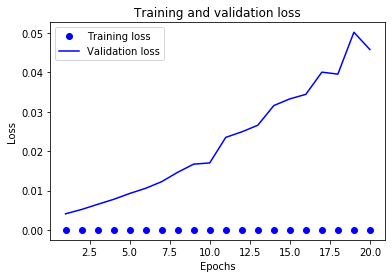

In [15]:
# plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
print('\n\nThe contents of history:')
for i in history.history.items():
    print(i)

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

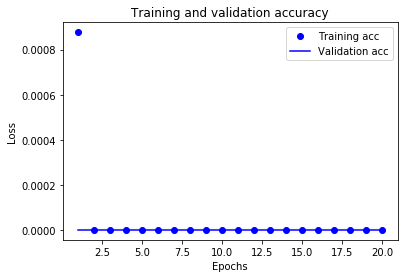

In [17]:
plt.clf() # clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

In [22]:
# generating preditions for new data
predictions = model.predict(x_test)
# taking a look at predictions
predictions[0].shape
predictions[0]

array([6.5602723e-25, 1.3884728e-06, 2.5009960e-38, 3.8576290e-33,
       8.8172751e-33, 2.5797926e-33, 1.4334213e-15, 7.0094633e-36,
       1.9279074e-38, 4.9638571e-22, 6.1312044e-30, 9.9999857e-01,
       4.2280497e-37, 3.4273240e-37, 0.0000000e+00, 2.9232879e-33,
       1.9116376e-13, 2.7309461e-31, 2.3220963e-38, 9.4915598e-30,
       7.3879199e-37, 6.1012637e-17, 1.5254324e-30, 3.1601005e-28,
       1.5166855e-26, 2.1842522e-26, 5.9343484e-36, 3.0446488e-32,
       1.0042497e-37, 1.0981471e-27, 1.6787031e-33, 1.5352319e-10,
       1.2400675e-24, 3.2694906e-29, 3.6434238e-33, 1.4459762e-22,
       1.4932319e-29, 3.4111391e-36, 2.2476031e-34, 1.0378018e-36,
       1.6633822e-29, 1.7763865e-27, 1.4514190e-23, 1.3947355e-38,
       2.1409593e-26, 2.7534869e-25], dtype=float32)

In [23]:
np.sum(predictions[0])

0.99999994

In [24]:
np.argmax(predictions[0])

11

In [25]:
# Encoding the labels as integer arrays
y_train = np.array(train_labels)
y_test = np.array(test_labels)
# Using the spase_categorical_crossentropy loss
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])